In [1]:
# Import Library
import mysql.connector as connection
import sqlite3
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import geopandas as gpd
import datetime 
import warnings
warnings.filterwarnings('ignore')

### PHASE 3
#### 3.1 
* #### Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table

In [2]:
import mysql.connector

db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Dishasharma@2911"
)

if db.is_connected():
    print("Database Connected")

Database Connected


In [3]:
# Connect to MySQL database
db_connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Dishasharma@2911'
)
cursor = db_connection.cursor()

# DROP the database (replace 'your_database' with the actual database name)
cursor.execute("DROP DATABASE crime_datasets;")

# Close the connection
cursor.close()
db_connection.close()

In [4]:

import mysql.connector

db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Dishasharma@2911"
)

cursor = db.cursor()
cursor.execute("CREATE DATABASE Crime_datasets")

print("Database Created Successful !!!")

Database Created Successful !!!


In [5]:

import mysql.connector

db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Dishasharma@2911",
    database="Crime_datasets",
)

cursor = db.cursor()
sql = """CREATE TABLE 42_district_women_crime (
            Id INT AUTO_INCREMENT PRIMARY KEY,
            STATE_UT VARCHAR(255),
            DISTRICT VARCHAR(255),
            Year INT,
            Rape INT,
            Kidnapping_and_Abduction INT,
            Dowry_Deaths INT,
            Assault_on_women_with_intent_to_outrage_her_modesty INT,
            Insult_to_modesty_of_Women INT,
            Cruelty_by_Husband_or_his_Relatives INT,
            Importation_of_Girls INT
 
)
"""
cursor.execute(sql)

print("Table Created Successful !!!")

Table Created Successful !!!


In [8]:
import mysql.connector

db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Dishasharma@2911",
    database="Crime_datasets",
)

cursor = db.cursor()

 # Load CSV file into a pandas DataFrame
csv_file_path = '42_District_wise_crimes_committed_against_women_2001_2012.csv'
df = pd.read_csv(csv_file_path)

# Specify the table name
table_name = '42_district_women_crime'
# Insert data into the table
insert_query = f"INSERT INTO {table_name} (STATE_UT, DISTRICT, Year, Rape, Kidnapping_and_Abduction, Dowry_Deaths, " \
                f"Assault_on_women_with_intent_to_outrage_her_modesty, Insult_to_modesty_of_Women, " \
                f"Cruelty_by_Husband_or_his_Relatives, Importation_of_Girls) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"

values = df[["STATE/UT", "DISTRICT", "Year", "Rape", "Kidnapping and Abduction", "Dowry Deaths",
            "Assault on women with intent to outrage her modesty", "Insult to modesty of Women",
            "Cruelty by Husband or his Relatives", "Importation of Girls"]].values.tolist()

cursor.executemany(insert_query, values)

try:
    
    db.commit()

    print("Data inserted into the table successfully.")

except Exception as e:
    print(f"Error: {e}")



Data inserted into the table successfully.


### PHASE 3
#### 3.2
* #### Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year

In [10]:
 #Connect to MySQL database
db_connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Dishasharma@2911',
    database='crime_datasets'  # Specify the database name
)
cursor = db_connection.cursor()

try:
    # Execute the SQL query
    query = '''
        SELECT 
            STATE_UT, 
            DISTRICT, 
            Year, 
            SUM(Rape) AS Total_Rapes, 
            SUM(Kidnapping_and_Abduction) AS Total_Kidnappings
        FROM 
            42_district_women_crime
        GROUP BY 
            STATE_UT, DISTRICT, Year;
    '''
    cursor.execute(query)

    # Fetch the results into a pandas DataFrame
    result_df = pd.DataFrame(cursor.fetchall(), columns=['STATE_UT', 'DISTRICT', 'Year', 'Total_Rapes', 'Total_Kidnappings'])

    print("Results:")
    print(result_df)

except Exception as e:
    print(f"Error: {e}")

finally:
    # Close the connection in the 'finally' block to ensure it's always closed
    cursor.close()
    db_connection.close()
    print("MySQL connection closed.")

Results:
            STATE_UT       DISTRICT  Year Total_Rapes Total_Kidnappings
0     ANDHRA PRADESH       ADILABAD  2001         150                90
1     ANDHRA PRADESH      ANANTAPUR  2001          69                90
2     ANDHRA PRADESH       CHITTOOR  2001          81               102
3     ANDHRA PRADESH       CUDDAPAH  2001          60                60
4     ANDHRA PRADESH  EAST GODAVARI  2001          69                78
...              ...            ...   ...         ...               ...
9011     LAKSHADWEEP    LAKSHADWEEP  2012           0                 0
9012     LAKSHADWEEP          TOTAL  2012           0                 0
9013      PUDUCHERRY       KARAIKAL  2012          18                 6
9014      PUDUCHERRY     PUDUCHERRY  2012          21                42
9015      PUDUCHERRY          TOTAL  2012          39                48

[9016 rows x 5 columns]
MySQL connection closed.


### PHASE 3 
#### 3.3
* #### Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year



In [11]:
import mysql.connector
import pandas as pd

# Connect to MySQL database
db_connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Dishasharma@2911',
    database='crime_datasets'  # Specify the database name
)
cursor = db_connection.cursor()

try:
    # Execute the SQL query
    query = '''
        SELECT 
            STATE_UT, 
            DISTRICT, 
            Year, 
            MIN(Rape) AS Min_Rapes, 
            MIN(Kidnapping_and_Abduction) AS Min_Kidnappings
        FROM 
            42_district_women_crime
        GROUP BY 
            STATE_UT, DISTRICT, Year;
    '''
    cursor.execute(query)

    # Fetch the results into a pandas DataFrame
    result_df = pd.DataFrame(cursor.fetchall(), columns=['STATE_UT', 'DISTRICT', 'Year', 'Min_Rapes', 'Min_Kidnappings'])

    print("Results:")
    print(result_df)

except Exception as e:
    print(f"Error: {e}")

finally:
    # Close the connection in the 'finally' block to ensure it's always closed
    cursor.close()
    db_connection.close()
    print("MySQL connection closed.")


Results:
            STATE_UT       DISTRICT  Year  Min_Rapes  Min_Kidnappings
0     ANDHRA PRADESH       ADILABAD  2001         50               30
1     ANDHRA PRADESH      ANANTAPUR  2001         23               30
2     ANDHRA PRADESH       CHITTOOR  2001         27               34
3     ANDHRA PRADESH       CUDDAPAH  2001         20               20
4     ANDHRA PRADESH  EAST GODAVARI  2001         23               26
...              ...            ...   ...        ...              ...
9011     LAKSHADWEEP    LAKSHADWEEP  2012          0                0
9012     LAKSHADWEEP          TOTAL  2012          0                0
9013      PUDUCHERRY       KARAIKAL  2012          6                2
9014      PUDUCHERRY     PUDUCHERRY  2012          7               14
9015      PUDUCHERRY          TOTAL  2012         13               16

[9016 rows x 5 columns]
MySQL connection closed.


### PHASE 3
#### 3.4
* #### Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

In [12]:
import mysql.connector

db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Dishasharma@2911",
    database="Crime_datasets",
)

cursor = db.cursor()
sql = """CREATE TABLE 02_01_District_ST_2001_2012 (
            Id INT AUTO_INCREMENT PRIMARY KEY,
            STATE_UT VARCHAR(255),
            DISTRICT VARCHAR(255),
            Year INT,
            Murder INT,
            Rape INT,
            Kidnapping_Abduction INT,
            Dacoity INT,
            Robbery INT,
            Arson INT,
            Hurt INT,
            Protection_of_Civil_Rights_PCR_Act INT,
            Prevention_of_atrocities_POA_Act INT,
            Other_Crimes_Against_STs INT
)
"""
cursor.execute(sql)

print("Table Created Successfully!!!")


Table Created Successfully!!!


In [15]:
import mysql.connector
import pandas as pd

# Connect to MySQL database
db_connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Dishasharma@2911',
    database='crime_datasets'  # Specify the database name
)
cursor = db_connection.cursor()

try:
    # Load CSV file into a pandas DataFrame
    csv_file_path = '02_District_wise_crimes_committed_against_ST_2001_2012.csv'
    df2 = pd.read_csv(csv_file_path)

    # Insert data into the new table
    table_name = '02_01_District_ST_2001_2012'
    insert_query = f"INSERT INTO {table_name} (STATE_UT, DISTRICT, Year, Murder, Rape, Kidnapping_Abduction, " \
                    f"Dacoity, Robbery, Arson, Hurt,  " \
                    f"Protection_of_Civil_Rights_PCR_Act,Prevention_of_atrocities_POA_Act ,Other_Crimes_Against_STs) VALUES " \
                    f"(%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"

    # Check the actual column names in the DataFrame
    print(df2.columns)

    # Update the column names in the following line based on the output of df2.columns
    values = df2[["STATE/UT", "DISTRICT", "Year", "Murder", "Rape", "Kidnapping Abduction",
                  "Dacoity", "Robbery", "Arson", "Hurt", "Protection of Civil Rights PCR Act","Prevention of atrocities POA Act",
                   "Other Crimes Against STs"]].values.tolist()

    cursor.executemany(insert_query, values)
    db_connection.commit()

    print(f"Data inserted into the '{table_name}' table successfully.")

except Exception as e:
    print(f"Error: {e}")

finally:
    # Close the connection in the 'finally' block to ensure it's always closed
    cursor.close()
    db_connection.close()
    print("MySQL connection closed.")


Index(['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Rape',
       'Kidnapping Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Protection of Civil Rights PCR Act',
       'Prevention of atrocities POA Act', 'Other Crimes Against STs'],
      dtype='object')
Data inserted into the '02_01_District_ST_2001_2012' table successfully.
MySQL connection closed.


In [16]:
import mysql.connector
import pandas as pd

# Connect to MySQL database
db_connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Dishasharma@2911',
    database='Crime_datasets'  # Specify the database name
)
cursor = db_connection.cursor()

try:
    # Load CSV file into a pandas DataFrame
    csv_file_path = '02_District_wise_crimes_committed_against_ST_2001_2012.csv'
    df2 = pd.read_csv(csv_file_path)

    # Insert data into the new table
    table_name = '02_01_District_ST_2001_2012'
    insert_query = f"INSERT INTO {table_name} (STATE_UT, DISTRICT, Year, Murder, Rape, Kidnapping_Abduction, " \
                    f"Dacoity, Robbery, Arson, Hurt, Protection_of_Civil_Rights_PCR_Act, " \
                    f"Prevention_of_atrocities_POA_Act, Other_Crimes_Against_STs) VALUES " \
                    f"(%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"

    # Check the actual column names in the DataFrame
    print(df2.columns)

    # Update the column names in the following line based on the output of df2.columns
    values = df2[["STATE/UT", "DISTRICT", "Year", "Murder", "Rape", "Kidnapping Abduction",
                  "Dacoity", "Robbery", "Arson", "Hurt", "Protection of Civil Rights PCR Act",
                  "Prevention of atrocities POA Act", "Other Crimes Against STs"]].values.tolist()

    cursor.executemany(insert_query, values)
    db_connection.commit()

    print(f"Data inserted into the '{table_name}' table successfully.")

except Exception as e:
    print(f"Error: {e}")

finally:
    # Close the connection in the 'finally' block to ensure it's always closed
    cursor.close()
    db_connection.close()
    print("MySQL connection closed.")


Index(['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Rape',
       'Kidnapping Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Protection of Civil Rights PCR Act',
       'Prevention of atrocities POA Act', 'Other Crimes Against STs'],
      dtype='object')
Data inserted into the '02_01_District_ST_2001_2012' table successfully.
MySQL connection closed.


### phase 3
#### 3.5
* #### Write SQL query to find the highest number of dacoity/robbery in which district.

In [17]:
# Connect to MySQL database
db_connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Dishasharma@2911',
    database='crime_datasets'
)
cursor = db_connection.cursor()

try:
    # Execute SQL query
    query = '''
        SELECT DISTRICT, MAX(Dacoity + Robbery) AS Max_Dacoity_Robbery
        FROM 02_01_District_ST_2001_2012
        GROUP BY DISTRICT;
    '''
    cursor.execute(query)

    # Fetch the results
    results = cursor.fetchall()

    # Display the results
    for result in results:
        district, max_dacoity_robbery = result
        print(f"District: {district}, Max Dacoity/Robery: {max_dacoity_robbery}")

except Exception as e:
    print(f"Error: {e}")

finally:
    # Close the connection in the 'finally' block to ensure it's always closed
    cursor.close()
    db_connection.close()
    print("MySQL connection closed.")

District: ADILABAD, Max Dacoity/Robery: 0
District: ANANTAPUR, Max Dacoity/Robery: 0
District: CHITTOOR, Max Dacoity/Robery: 0
District: CUDDAPAH, Max Dacoity/Robery: 0
District: EAST GODAVARI, Max Dacoity/Robery: 0
District: GUNTAKAL RLY., Max Dacoity/Robery: 0
District: GUNTUR, Max Dacoity/Robery: 0
District: HYDERABAD CITY, Max Dacoity/Robery: 0
District: KARIMNAGAR, Max Dacoity/Robery: 1
District: KHAMMAM, Max Dacoity/Robery: 0
District: KRISHNA, Max Dacoity/Robery: 1
District: KURNOOL, Max Dacoity/Robery: 0
District: MAHABOOBNAGAR, Max Dacoity/Robery: 0
District: MEDAK, Max Dacoity/Robery: 0
District: NALGONDA, Max Dacoity/Robery: 0
District: NELLORE, Max Dacoity/Robery: 0
District: NIZAMABAD, Max Dacoity/Robery: 1
District: PRAKASHAM, Max Dacoity/Robery: 0
District: RANGA REDDY, Max Dacoity/Robery: 0
District: SECUNDERABAD RLY., Max Dacoity/Robery: 0
District: SRIKAKULAM, Max Dacoity/Robery: 0
District: VIJAYAWADA, Max Dacoity/Robery: 0
District: VIJAYAWADA RLY., Max Dacoity/Robe

### PHASE 3
#### 3.7
* #### Write SQL query to find in which districts(All) the lowest number of murders happened

In [18]:
# Connect to MySQL database
db_connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Dishasharma@2911',
    database='crime_datasets'
)
cursor = db_connection.cursor()

try:
    # Execute SQL query
    query = '''
        SELECT DISTRICT, Year, SUM(Murder) AS Total_Murders
        FROM 02_01_District_ST_2001_2012
        GROUP BY DISTRICT, Year
        ORDER BY DISTRICT, Year, Total_Murders ASC;
    '''
    cursor.execute(query)

    # Fetch the results
    results = cursor.fetchall()

    # Display the results
    for result in results:
        district, year, total_murders = result
        print(f"District: {district}, Year: {year}, Total Murders: {total_murders}")

except Exception as e:
    print(f"Error: {e}")

finally:
    # Close the connection in the 'finally' block to ensure it's always closed
    cursor.close()
    db_connection.close()
    print("MySQL connection closed.")

District: 24 PARGANAS NORTH, Year: 2001, Total Murders: 0
District: 24 PARGANAS NORTH, Year: 2002, Total Murders: 0
District: 24 PARGANAS NORTH, Year: 2003, Total Murders: 0
District: 24 PARGANAS NORTH, Year: 2004, Total Murders: 0
District: 24 PARGANAS NORTH, Year: 2005, Total Murders: 0
District: 24 PARGANAS NORTH, Year: 2006, Total Murders: 0
District: 24 PARGANAS NORTH, Year: 2007, Total Murders: 0
District: 24 PARGANAS NORTH, Year: 2008, Total Murders: 0
District: 24 PARGANAS NORTH, Year: 2009, Total Murders: 0
District: 24 PARGANAS NORTH, Year: 2010, Total Murders: 0
District: 24 PARGANAS NORTH, Year: 2011, Total Murders: 0
District: 24 PARGANAS NORTH, Year: 2012, Total Murders: 0
District: 24 PARGANAS SOUTH, Year: 2001, Total Murders: 0
District: 24 PARGANAS SOUTH, Year: 2002, Total Murders: 0
District: 24 PARGANAS SOUTH, Year: 2003, Total Murders: 0
District: 24 PARGANAS SOUTH, Year: 2004, Total Murders: 0
District: 24 PARGANAS SOUTH, Year: 2005, Total Murders: 0
District: 24 P

### PHASE3
#### 3.8.1
* #### Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 

In [19]:
db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Dishasharma@2911",
    database="Crime_datasets",
)

cursor = db.cursor()
sql = """CREATE TABLE 01_District_wise_crimes_IPC_2001_2012 (
            Id INT AUTO_INCREMENT PRIMARY KEY,
            STATE_UT VARCHAR(255) NULL,
            DISTRICT VARCHAR(255) NULL ,
            YEAR INT NULL,
            MURDER INT NULL,
            ATTEMPT_TO_MURDER INT NULL,
            RAPE INT NULL
            
            
            
 
)
"""
cursor.execute(sql)

print("Table Created Successful !!!")

Table Created Successful !!!


* ### 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table

In [20]:
import mysql.connector
import pandas as pd

# Connect to MySQL database
db_connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Dishasharma@2911',
    database='Crime_datasets'  # Specify the database name
)
cursor = db_connection.cursor()

try:
    # Load CSV file into a pandas DataFrame
    csv_file_path = '01_District_wise_crimes_committed_IPC_2001_2012.csv'
    df3 = pd.read_csv(csv_file_path)

    # Insert data into the new table
    table_name = '01_District_wise_crimes_IPC_2001_2012'
    insert_query = f"INSERT INTO {table_name} (STATE_UT, DISTRICT, YEAR, MURDER, ATTEMPT_TO_MURDER, RAPE) VALUES " \
                    f"(%s, %s, %s, %s, %s, %s)"

    # Update the column names in the following line based on the output of df3.columns
    values = df3[["STATE/UT", "DISTRICT", "YEAR", "MURDER", "ATTEMPT TO MURDER", "RAPE"]].values.tolist()

    cursor.executemany(insert_query, values)
    db_connection.commit()

    print(f"Data inserted into the '{table_name}' table successfully.")

except Exception as e:
    print(f"Error: {e}")

finally:
    # Close the connection in the 'finally' block to ensure it's always closed
    cursor.close()
    db_connection.close()
    print("MySQL connection closed.")


Data inserted into the '01_District_wise_crimes_IPC_2001_2012' table successfully.
MySQL connection closed.


* #### 3.8.2Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.

In [21]:
import mysql.connector
import pandas as pd

# Connect to MySQL database
db_connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Dishasharma@2911',
    database='Crime_datasets'
)
cursor = db_connection.cursor()

try:
    # Write the SQL query
    query = '''
        SELECT STATE_UT, YEAR, DISTRICT, MURDER
        FROM (
            SELECT
                STATE_UT,
                YEAR,
                DISTRICT,
                MURDER,
                ROW_NUMBER() OVER (PARTITION BY STATE_UT, YEAR ORDER BY MURDER DESC) AS ranking
            FROM 01_District_wise_crimes_IPC_2001_2012
        ) AS ranked
        WHERE ranking = 1;
    '''

    # Execute the query and fetch the results into a pandas DataFrame
    df_result = pd.read_sql(sql=query, con=db_connection)

    # Display the result
    print(df_result)

except Exception as e:
    print(f"Error: {e}")

finally:
    # Close the connection in the 'finally' block to ensure it's always closed
    cursor.close()
    db_connection.close()
    print("MySQL connection closed.")


          STATE_UT  YEAR DISTRICT  MURDER
0    A & N ISLANDS  2001  ANDAMAN      13
1    A & N ISLANDS  2002    TOTAL      17
2    A & N ISLANDS  2003    TOTAL      21
3    A & N ISLANDS  2004    TOTAL      15
4    A & N ISLANDS  2005  ANDAMAN      14
..             ...   ...      ...     ...
415    WEST BENGAL  2008    TOTAL    1811
416    WEST BENGAL  2009    TOTAL    2068
417    WEST BENGAL  2010    TOTAL    2398
418    WEST BENGAL  2011    TOTAL    2109
419    WEST BENGAL  2012    TOTAL    2252

[420 rows x 4 columns]
MySQL connection closed.


* #### 3.8.3Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.

In [ ]:
import mysql.connector
import pandas as pd

# Connect to MySQL database
db_connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Dishasharma@2911',
    database='Crime_datasets'
)
cursor = db_connection.cursor()

try:
    # Write the SQL query
    query = '''
        SELECT STATE_UT, YEAR, DISTRICT, MURDER
        FROM (
            SELECT
                STATE_UT,
                YEAR,
                DISTRICT,
                MURDER,
                ROW_NUMBER() OVER (PARTITION BY STATE_UT, YEAR ORDER BY MURDER DESC) AS ranking
            FROM 01_District_wise_crimes_IPC_2001_2012
        ) AS ranked
        WHERE ranking = 1;
    '''

    # Execute the query and fetch the results into a pandas DataFrame
    df_result = pd.read_sql(sql=query, con=db_connection)

    # Display the result
    print("Original Data:")
    print(df_result)

except Exception as e:
    print(f"Error: {e}")

finally:
    # Close the connection in the 'finally' block to ensure it's always closed
    cursor.close()
    db_connection.close()
    print("MySQL connection closed.")


In [22]:
# Filter districts that appear 3 or more than 3 years
district_counts = df_result['DISTRICT'].value_counts()
selected_districts = district_counts[district_counts >= 3].index

# Filter the DataFrame based on selected districts
filtered_df = df_result[df_result['DISTRICT'].isin(selected_districts)]

# Display the filtered result
print("\nFiltered Data:")
print(filtered_df)


Filtered Data:
          STATE_UT  YEAR DISTRICT  MURDER
0    A & N ISLANDS  2001  ANDAMAN      13
1    A & N ISLANDS  2002    TOTAL      17
2    A & N ISLANDS  2003    TOTAL      21
3    A & N ISLANDS  2004    TOTAL      15
4    A & N ISLANDS  2005  ANDAMAN      14
..             ...   ...      ...     ...
415    WEST BENGAL  2008    TOTAL    1811
416    WEST BENGAL  2009    TOTAL    2068
417    WEST BENGAL  2010    TOTAL    2398
418    WEST BENGAL  2011    TOTAL    2109
419    WEST BENGAL  2012    TOTAL    2252

[418 rows x 4 columns]


* ### 3.8.4Use appropriate graphs to show your data (the result of 3.8.3)

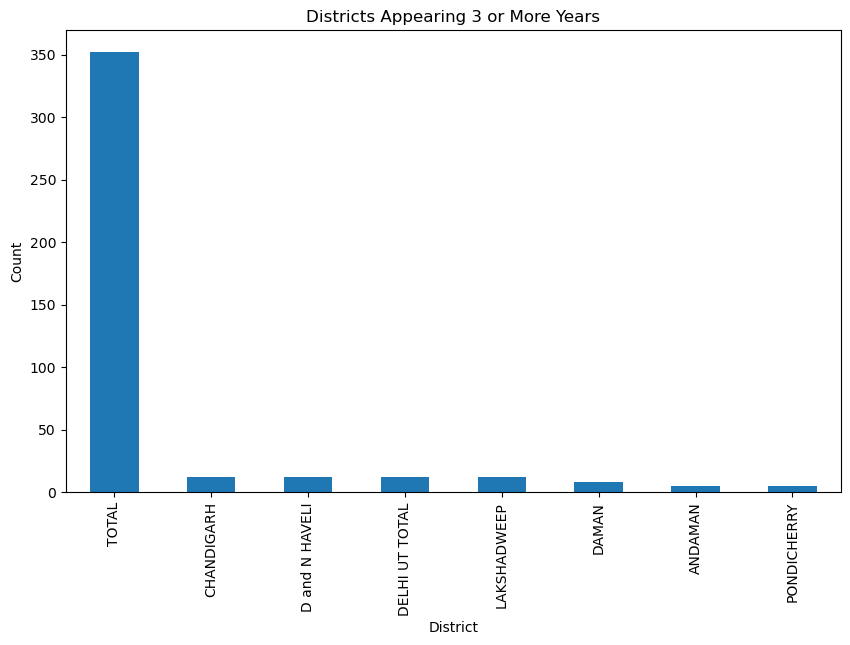

In [23]:
import matplotlib.pyplot as plt

# Plot bar chart for selected districts
plt.figure(figsize=(10, 6))
filtered_df.groupby('DISTRICT')['YEAR'].count().sort_values(ascending=False).plot(kind='bar')
plt.title('Districts Appearing 3 or More Years')
plt.xlabel('District')
plt.ylabel('Count')
plt.show()